**Table of contents**<a id='toc0_'></a>    
- [Relax Data Science Challenge](#toc1_)    
  - [Imports and functions](#toc1_1_)    
  - [Import Data](#toc1_2_)    
  - [EDA](#toc1_3_)    
    - [Defining   an    "adopted   user"    as   a   user   who     has   logged   into   the   product   on   three   separate days   in   at   least   one   seven­day   period ,   identify   which   factors   predict   future   user adoption](#toc1_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Relax Data Science Challenge](#toc0_)

## <a id='toc1_1_'></a>[Imports and functions](#toc0_)

In [63]:
import math as mth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score,classification_report, roc_curve,auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer,FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
import tensorflow as tf
import scipy
from scipy.stats import linregress
from scipy.stats import pearsonr
import statsmodels
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta
import random
import sys
import os
from io import StringIO
import json # library to handle JSON files
from matplotlib import cm,colors
from matplotlib.colors import Normalize
from geopy.geocoders import Nominatim # convert an place into latitude and longitude values
import folium # map rendering library
from bs4 import BeautifulSoup
import camelot
import requests
from IPython import get_ipython

In [64]:
import warnings

# Customize how warnings are displayed
warnings.filterwarnings('always', module='.*')
warnings.formatwarning = lambda message, category, filename, lineno, line=None: f'{category.__name__}: {message}\n'

General Classes and Functions

In [65]:
# Class to create Plots grid

from itertools import product,cycle,combinations
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class Plotsgrid:

    """ Creates a nxn grid of plots for an input df. Shows blank for grid values exceeding number of columns of df"""


    def __init__(self,df):
        self.df=df 

    def figure_params(self,size_fac1,size_fac2):
        df=self.df
        n_data_cols=len(df.columns)
        self.n_data_cols=n_data_cols 

        n_cols=int(n_data_cols**.5)
        n_rows=0
        while n_rows*n_cols<n_data_cols:
            n_rows+=1
        # Create the figure and axes grid
        fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(int(size_fac1*n_data_cols),int(size_fac2*n_rows)))
        
        # Flatten the axs array for easier iteration
        if n_rows == 1 and n_cols == 1:  # Only one subplot
            self.axs = [axs]
        else:
            self.axs = axs.flatten()

    # Loop through the axes and Hist plot
    def histplots(self,bins=-1,density=False):
        # Initialize figure 
        self.figure_params(1,2)
        # Create a cycler to iterate over the DataFrame columns
        cycler = cycle(self.df.columns)
        for i,ax in enumerate(self.axs):
            if i==self.n_data_cols:
                ax.set_visible(False)  # Hide any extra subplots if there are more subplots than columns
                break
            col = next(cycler)  # Get the next column name
            if bins==-1:
                if density:
                    sns.histplot(data=self.df, x=col, ax=ax,stat='density')  # Plot the histogram on the current axis
                else:
                    sns.histplot(data=self.df, x=col, ax=ax)  # Plot the histogram on the current axis
            else:
                if density:
                    sns.histplot(data=self.df, x=col, ax=ax,bins=bins,stat='density')  # Plot the histogram on the current axis
                else:
                    sns.histplot(data=self.df, x=col, ax=ax,bins=bins)  # Plot the histogram on the current axis
        plt.tight_layout()
        plt.show()

    # Loop through the axes and Box plot
    def boxplots(self):

        # Coerce df to numeric:
        df=self.df.apply(pd.to_numeric,errors='coerce').dropna(how='all',axis=1)
        
        # Initialize figure 
        self.figure_params(1,2)
        # Create a cycler to iterate over the DataFrame columns
        cycler = cycle(df.columns)
        for i,ax in enumerate(self.axs):
            try:
                if i==self.n_data_cols:
                    ax.set_visible(False)  # Hide any extra subplots if there are more subplots than columns
                    break
                col = next(cycler)  # Get the next column name
                sns.boxplot(data=df, y=col, ax=ax)  # Plot the boxplot on the current axis
            except Exception as E:
                print(E)
        plt.tight_layout()
        plt.show()

    # Loop through the axes and Line plot
    def lineplots(self):
        # Initialize figure 
        self.figure_params(5,5)
        # Create a cycler to iterate over the DataFrame columns
        cycler = cycle(self.df.columns)
        for i,ax in enumerate(self.axs):
            if i==self.n_data_cols:
                ax.set_visible(False)  # Hide any extra subplots if there are more subplots than columns
                break
            col = next(cycler)  # Get the next column name
            print(col)
            sns.lineplot(data=self.df,x=self.df.index,y=col, ax=ax)  # Plot the Line on the current axis
        plt.tight_layout()
        plt.show()

    def scatterplots(self):

        # Coerce df to numeric:
        df=self.df.apply(pd.to_numeric,errors='coerce').dropna(how='all',axis=1)
        
        # Get all numeric combinations
        col_combinations = list(combinations(df.columns, 2))
        num_combs = len(col_combinations)
        
        # Calculate grid size based on the number of combinations
        n_cols = int(np.ceil(np.sqrt(num_combs)))
        n_rows = int(np.ceil(num_combs / n_cols))

        # Create the figure and axes grid
        fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(int(2*n_cols),int(2.5*n_rows)))
        
        plt.suptitle('Pairwise Scatter with higher correlations shown brighter')
        axs = axs.flatten()  # Flatten the axes array for easier iteration

        # Iterate through each combination and plot scatterplots
        for i, (col_x, col_y) in enumerate(col_combinations):
            ax = axs[i]

            df_x_y=df[[col_x,col_y]].dropna()

            x = df_x_y[col_x]
            y = df_x_y[col_y]

            # Calculate Pearson correlation and p-value
            if len(x) > 1 and len(y) > 1:  # Ensure there are enough data points
                corr, p_value = pearsonr(x, y)
                corr_array=np.array([corr]*x.shape[0])
                # Scatter plot with colored points
                sns.scatterplot(x=x, y=y, ax=ax,hue=corr_array, palette='coolwarm',hue_norm=(-1,1),legend=False)

                # Add correlation coefficient and p-value as the legend
                ax.text(0.05, 0.95, f"r = {corr:.2f}\np = {p_value:.2e}", 
                        transform=ax.transAxes, fontsize=7, verticalalignment='top',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", edgecolor="black"))
                
                # Set plot labels
                ax.set_xlabel(col_x)
                ax.set_ylabel(col_y)

        # Hide any extra subplots
        for j in range(i + 1, len(axs)):
            axs[j].set_visible(False)
        plt.tight_layout()
        plt.show()

In [66]:
def mape(y_true, y_pred):
    """Compute the mean absolute percentage error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
def basic_eda(df):
    # Check if 'df' is a DataFrame
    if isinstance(df, pd.DataFrame):
        pass
    else:
        df=pd.DataFrame(df)
    cols=df.columns.tolist()
    print('\nCOLUMNS LIST: ')
    print(cols)
    print('\nFIRST FEW: ')
    print(df.head(3))
    print('\nLAST FEW: ')
    print(df.tail(3))
    print('\nINFO: ')
    print(df.info())
    print('\nDESCRIPTION: ')
    print(df.describe())
    return cols

## <a id='toc1_2_'></a>[Import Data](#toc0_)

In [68]:
import chardet

# Detect encoding
with open('takehome_users.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

# Use the detected encoding
df_user_detail = pd.read_csv('takehome_users.csv', encoding=result['encoding'])
df_user_engagement = pd.read_csv('takehome_user_engagement.csv', encoding=result['encoding'])


{'encoding': 'ISO-8859-1', 'confidence': 0.7299208911655781, 'language': ''}


## <a id='toc1_3_'></a>[EDA](#toc0_)

In [69]:
user_detail_cols=basic_eda(df_user_detail)


COLUMNS LIST: 
['object_id', 'creation_time', 'name', 'email', 'creation_source', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']

FIRST FEW: 
   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                      

In [70]:
user_engagement_cols=basic_eda(df_user_engagement)


COLUMNS LIST: 
['time_stamp', 'user_id', 'visited']

FIRST FEW: 
            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1

LAST FEW: 
                 time_stamp  user_id  visited
207914  2014-04-27 12:45:16    11998        1
207915  2012-06-02 11:55:59    11999        1
207916  2014-01-26 08:57:12    12000        1

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None

DESCRIPTION: 
             user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000      

### <a id='toc1_3_1_'></a>[Defining   an    "adopted   user"    as   a   user   who     has   logged   into   the   product   on   three   separate days   in   at   least   one   seven­day   period ,   identify   which   factors   predict   future   user adoption](#toc0_)

In [71]:
# Merge the two datasets
df_users=df_user_detail.merge(df_user_engagement,left_on='object_id',right_on='user_id',how='inner')

In [72]:
# Overview
cols_users=basic_eda(df_users)


COLUMNS LIST: 
['object_id', 'creation_time', 'name', 'email', 'creation_source', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'time_stamp', 'user_id', 'visited']

FIRST FEW: 
   object_id        creation_time            name                     email  \
0          1  2014-04-22 03:53:30  Clausen August  AugustCClausen@yahoo.com   
1          2  2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   
2          2  2013-11-15 03:45:04   Poole Matthew    MatthewPoole@gustr.com   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE                1.398139e+09                         1   
1      ORG_INVITE                1.396238e+09                         0   
2      ORG_INVITE                1.396238e+09                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  \
0                           0      11             10803.0   
1       

In [73]:
# Look at example user id 2
df_users[df_users.user_id==2].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-31 03:45:04,2,1


<li> We get multiple rows with repeated user details, but unique login time_stamp. This is what we'd expect
<li> We also eliminated the nans in login details from user data because we combined the user engagement data
<li> User id and Object ID can also be dropped since our analysis shouldn't be tied to the id of the user (user agnostic)
<li> Personal details like name and email are not tied to 'user adoption' so those can be dropped while determining factors for user adoption
<li> We can convert 'creation_time' and 'timestamp' to UNIX timestamp to turn them into numbers

In [74]:
# First let's create an 'is_adopted' column that indicates whether a user is an adopted_user

# Step 1: Convert 'time_stamp' column to datetime
df_users['time_stamp'] = pd.to_datetime(df_users['time_stamp'])

# Step 2: Extract the date from the timestamp
df_users['login_date'] = df_users['time_stamp'].dt.date

# Step 3: Remove duplicate logins per day per user
df_unique_logins = df_users[['user_id', 'login_date']].drop_duplicates()

# Step 4: Define a function to check for 3 logins in 7 days
def is_adopted(user_logins):
    # Sort login dates
    user_logins = user_logins.sort_values()
    
    # Loop through login dates and check for 3 logins in a 7-day window
    for i in range(len(user_logins) - 2):
        # Check if the difference between the first and third login is 7 days or less
        if user_logins.iloc[i + 2] - user_logins.iloc[i] <= timedelta(days=7):
            return 1  # User is adopted
    return 0  # User is not adopted

# Step 5: Apply the function to each user
adopted_users = df_unique_logins.groupby('user_id')['login_date'].apply(is_adopted)

# Step 6: Map the adopted user result back to the original DataFrame
df_users['is_adopted'] = df_users['user_id'].map(adopted_users)

#Drop the 'login_date' column
df_users=df_users.drop(columns=['login_date'])

df_users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1,1


In [75]:
df_users[df_users.is_adopted==1]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,is_adopted
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1,1
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-31 03:45:04,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207898,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-23 11:04:47,11988,1,1
207899,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-24 11:04:47,11988,1,1
207900,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-26 11:04:47,11988,1,1
207901,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-27 11:04:47,11988,1,1


In [76]:
# Convert creation_time and 'timestamp' to UNIX
from datetime import datetime
def to_unix(dtstr):

    # Convert the string to a datetime object
    dt_obj = datetime.strptime(dtstr, "%Y-%m-%d %H:%M:%S")

    # Convert the datetime object to a Unix timestamp
    unix_timestamp = int(dt_obj.timestamp())

    return unix_timestamp

In [77]:
df_users.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1,0


In [78]:
df_users['creation_time']=df_users['creation_time'].apply(lambda x:to_unix(x))
df_users['time_stamp']=df_users['time_stamp'].astype(str).apply(lambda x:to_unix(x))

In [79]:
df_users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,is_adopted
0,1,1398119010,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1398119010,1,1,0
1,2,1384467304,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1384467304,2,1,1


In [80]:
# New df with dummy variables
df_users_dummies=pd.get_dummies(df_users.drop(columns=['user_id','object_id','name','email']))
df_users_dummies.head(3)

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,is_adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1398119010,1.398139e+09,1,0,11,10803.0,1398119010,1,0,True,False,False,False,False
1,1384467304,1.396238e+09,0,0,1,316.0,1384467304,1,1,False,True,False,False,False
2,1384467304,1.396238e+09,0,0,1,316.0,1385676904,1,1,False,True,False,False,False


In [81]:
df_users_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   creation_time                       207917 non-null  int64  
 1   last_session_creation_time          207917 non-null  float64
 2   opted_in_to_mailing_list            207917 non-null  int64  
 3   enabled_for_marketing_drip          207917 non-null  int64  
 4   org_id                              207917 non-null  int64  
 5   invited_by_user_id                  116887 non-null  float64
 6   time_stamp                          207917 non-null  int64  
 7   visited                             207917 non-null  int64  
 8   is_adopted                          207917 non-null  int64  
 9   creation_source_GUEST_INVITE        207917 non-null  bool   
 10  creation_source_ORG_INVITE          207917 non-null  bool   
 11  creation_source_PERSONAL_P

A couple more observations:
<li> There are several boolean columns that should be converted to int
<li> 'invited_by_user_id' contains many NANs


In [82]:
# Convert the boolean values to int
users_bool_cols=df_users_dummies.select_dtypes(bool).columns
df_users_dummies[users_bool_cols]=df_users_dummies[users_bool_cols].astype(int)
df_users_dummies.head(2)

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,is_adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1398119010,1.398139e+09,1,0,11,10803.0,1398119010,1,0,1,0,0,0,0
1,1384467304,1.396238e+09,0,0,1,316.0,1384467304,1,1,0,1,0,0,0


Let's look at possible imputation options for 'invited_by_user_id'

In [83]:
# What is the creation source for invited_by_user_id = nan?
df_user_detail[df_user_detail.invited_by_user_id.isna()].creation_source.value_counts()

creation_source
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64

As expected, guest invite is missing. So this is not missing data, they actually received no invites. Therefore, we can just impute these values with some random value, say -1

In [84]:
df_users_dummies['invited_by_user_id']=df_users_dummies['invited_by_user_id'].fillna(-1)

<span style="font-size:20px;"> Now we are ready to analyze feature importance </span>

In [85]:
# Create X and y data
target_col='is_adopted'
feature_cols=[col for col in df_users_dummies.columns if col!=target_col]
X=df_users_dummies[feature_cols]
y=df_users_dummies[target_col]

Training Accuracy: 0.9998


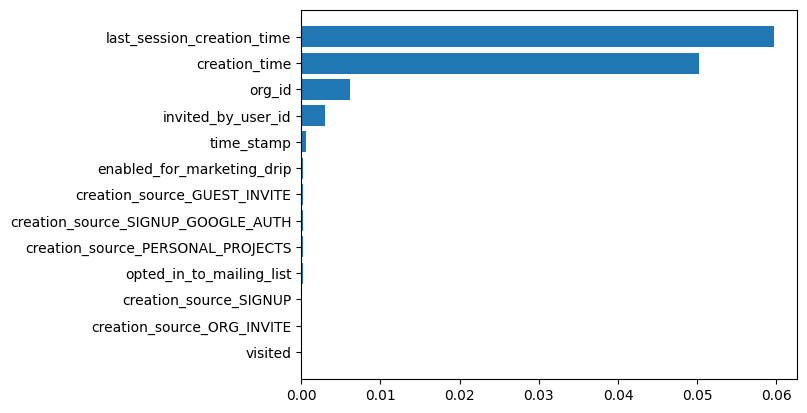

In [87]:
from sklearn.inspection import permutation_importance

model=XGBClassifier()

# Fit all data to model since we are looking at feature importance
model.fit(X,y)

# Get the training accuracy score
training_score = model.score(X, y)
print(f"Training Accuracy: {training_score:.4f}")

# Permutation score and feature importance
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
sorted_importances_idx = result.importances_mean.argsort()

plt.barh(range(X.shape[1]), result.importances_mean[sorted_importances_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_importances_idx])
plt.show()


<b> 'last_session_creation_time', 'creation_time', 'org_id', 'invited_by_user_id' and 'time_stamp' in that order have the most effect on user adoption </b>
<br> An important point to consider is that as new users are added, the contribution of invited_by_user_id can vary significantly